# Problem statement

The aim is to build a model to predict the selling price of the house for the real estate customers with respect to their budget and priorities. The house price is determined by using various factors such as geographical location, number of floors in the house, quality and current condition of the house, total area, furnished or non-furnished, number of bedrooms and bathrooms and so on. Here we make use of Machine Learning algorithms to build the price prediction model for the houses. We have around 21k records spread around 100 years of time span; this will fecilitate us to build an effective model.

## Importing Libraries :

In [552]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

In [553]:
# reading the CSV file into pandas dataframe
house_df = pd.read_csv("innercity.csv")

In [554]:
# Check top few records to get a feel of the data structure
house_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [555]:
#Shape of the data
house_df.shape

(21613, 23)

In [556]:

#5 point summary
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [557]:

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [558]:
# Exctracting Year from dayhours column which is the year in which house was sold
house_df["yr_sold"]=house_df["dayhours"].apply(lambda x:x[:4]).astype(int)
 # 'yr_sold' column is added as the last column
house_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015


In [559]:
house_df['house_age']=house_df['yr_sold']-house_df['yr_built']
house_df.head()

# This means there are 9 entries with yr_built greater than yr_sold. Age of the house cant be negative.


,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,house_age
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,9
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,98
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,61


In [560]:
house_df.loc[house_df.house_age < 0]
# Here we found out that House_age is negative in 12 entries. we need to fix this.

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,house_age
1233,9126100765,20140801T000000,455000,3,1.75,1320,1014,3.0,0,0,...,0,98122,47.6047,-122.305,1380,1495,1,2334,2014,-1
3109,5694500840,20141125T000000,559000,2,3.00,1650,960,3.0,0,0,...,0,98103,47.6611,-122.346,1650,3000,0,2610,2014,-1
10530,6169901185,20140520T000000,490000,5,3.50,4460,2975,3.0,0,2,...,0,98119,47.6313,-122.370,2490,4231,1,7435,2014,-1
11734,3076500830,20141029T000000,385195,1,1.00,710,6000,1.5,0,0,...,0,98144,47.5756,-122.316,1440,4800,0,6710,2014,-1
11744,6058600220,20140731T000000,230000,3,1.50,1040,1264,2.0,0,0,...,0,98144,47.5951,-122.301,1350,3000,1,2304,2014,-1
12509,9520900210,20141231T000000,614285,5,2.75,2730,6401,2.0,0,0,...,0,98072,47.7685,-122.160,2520,6126,0,9131,2014,-1
13333,1832100030,20140625T000000,597326,4,4.00,3570,8250,2.0,0,0,...,0,98040,47.5784,-122.226,2230,10000,1,11820,2014,-1
16360,2770601530,20140826T000000,500000,2,2.25,1570,1269,2.0,0,0,...,0,98199,47.6514,-122.385,1570,6000,1,2839,2014,-1
17202,9126100346,20140617T000000,350000,3,2.00,1380,3600,3.0,0,0,...,0,98122,47.6074,-122.305,1480,3600,0,4980,2014,-1
17763,1250200495,20140624T000000,455000,2,1.50,1200,1259,2.0,0,0,...,0,98144,47.6001,-122.298,1320,1852,0,2459,2014,-1


In [561]:
house_df['house_age']=house_df['house_age'].abs()

In [562]:
#cross check to know wheather the negative values are replaced with absolute values.
house_df.loc[house_df.house_age < 0]
# Wecan see that there are no negative values.

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,house_age


In [563]:
#converting some of the variables into categorical type
house_df['ceil'] = house_df.ceil.astype('category')
house_df['coast'] = house_df.coast.astype('category')
house_df['sight'] = house_df.sight.astype('category')
house_df['condition'] = house_df.condition.astype('category')
house_df['quality'] = house_df.quality.astype('category')
house_df['furnished'] = house_df.furnished.astype('category')

## Handling outliers :

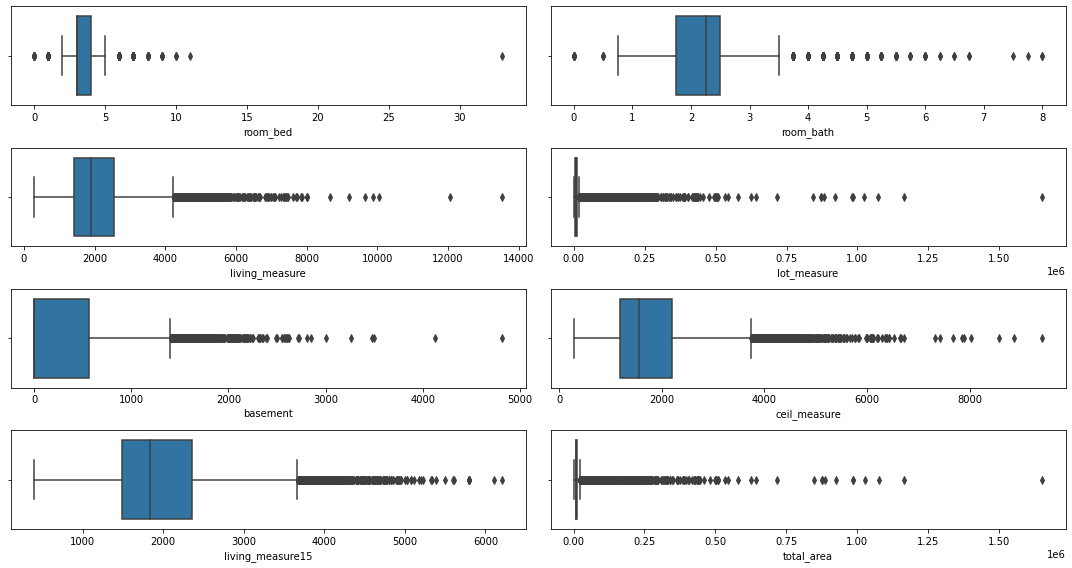

In [565]:
plt.figure(figsize=(15,8))
plt.subplot(4,2,1)
sns.boxplot(house_df['room_bed'])

plt.subplot(4,2,2)
sns.boxplot(house_df['room_bath'])

plt.subplot(4,2,3)
sns.boxplot(house_df['living_measure'])

plt.subplot(4,2,4)
sns.boxplot(house_df['lot_measure'])

plt.subplot(4,2,5)
sns.boxplot(house_df['basement'])

plt.subplot(4,2,6)
sns.boxplot(house_df['ceil_measure'])

plt.subplot(4,2,7)
sns.boxplot(house_df['living_measure15'])

plt.subplot(4,2,8)
sns.boxplot(house_df['total_area'])
plt.tight_layout()




####  By looking at the below boxplots we can infer that all attributes 'room_bed' 'room_bath' 'living_measure' , 'lot_measure' 'basement' 'ceil_measure' 'living_measure15' 'total_area' have outliers. But variation in the values of these attributes is expected; because not all houses will be similar to each other. By looking at the below boxplots we can infer that all attributes 'room_bed' 'room_bath' 'living_measure' 'lot_measure' 'basement' 'ceil_measure' 'living_measure15' 'total_area' have outliers. But variation in the values of these attributes is expected; because not all houses will be similar to each other.

In [566]:
def fixOutlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    house_df.loc[(col < min_value) | (col > max_value), col.name] = col.median()
    

fixOutlier (house_df.room_bed)
fixOutlier (house_df.room_bath)
fixOutlier (house_df.living_measure)
fixOutlier (house_df.living_measure15)
fixOutlier (house_df.lot_measure)
fixOutlier (house_df.lot_measure15)
fixOutlier (house_df.basement)
fixOutlier (house_df.ceil_measure)
fixOutlier (house_df.total_area)

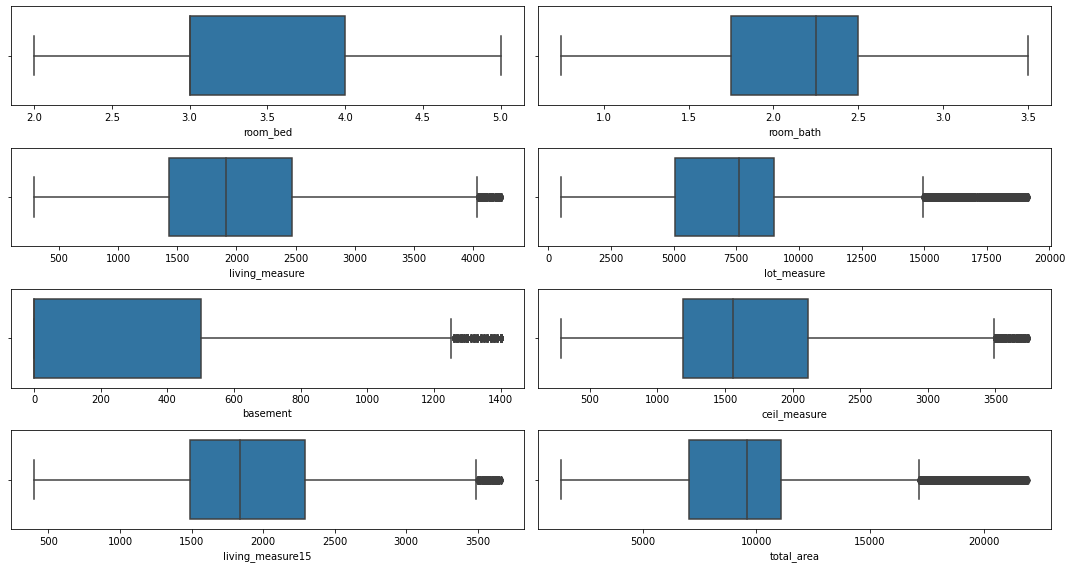

In [567]:
#Plots after removing outliers
plt.figure(figsize=(15,8))
plt.subplot(4,2,1)
sns.boxplot(house_df['room_bed'])

plt.subplot(4,2,2)
sns.boxplot(house_df['room_bath'])

plt.subplot(4,2,3)
sns.boxplot(house_df['living_measure'])

plt.subplot(4,2,4)
sns.boxplot(house_df['lot_measure'])

plt.subplot(4,2,5)
sns.boxplot(house_df['basement'])

plt.subplot(4,2,6)
sns.boxplot(house_df['ceil_measure'])

plt.subplot(4,2,7)
sns.boxplot(house_df['living_measure15'])

plt.subplot(4,2,8)
sns.boxplot(house_df['total_area'])
plt.tight_layout()


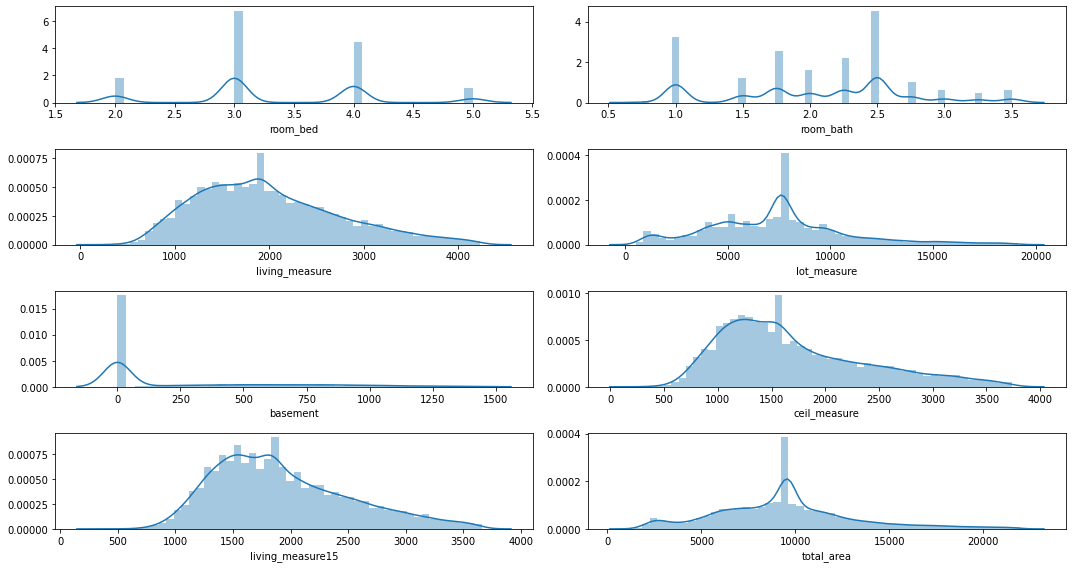

In [568]:
plt.figure(figsize=(15,8))

plt.subplot(4,2,1)
sns.distplot(house_df['room_bed'])

plt.subplot(4,2,2)
sns.distplot(house_df['room_bath'])

plt.subplot(4,2,3)
sns.distplot(house_df['living_measure'])

plt.subplot(4,2,4)
sns.distplot(house_df['lot_measure'])

plt.subplot(4,2,5)
sns.distplot(house_df['basement'])

plt.subplot(4,2,6)
sns.distplot(house_df['ceil_measure'])

plt.subplot(4,2,7)
sns.distplot(house_df['living_measure15'])

plt.subplot(4,2,8)
sns.distplot(house_df['total_area'])
plt.tight_layout()

#By looking at the below distribution plot we can say that 'room_bed' and 'room_bath' have few groups/clusters. 
#'living_measure','ceil_measure' and 'living_measure15' are normally distibuted but slighltly skewed to right.
# 'basement' and 'total_area' is not normally distributed and are heavily skewed.

# Exploratory Data Analysis - Visualizations

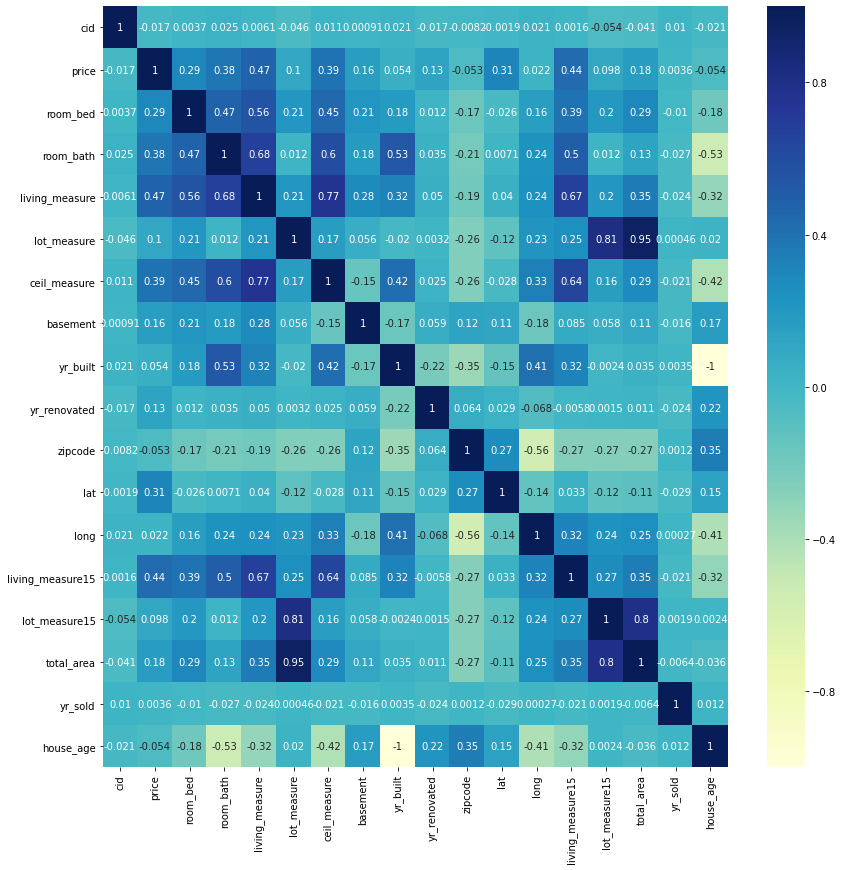

In [569]:
#HEATMAP FOR CORRELATION ANALYSIS
plt.figure(figsize=(14,14))
sns.heatmap(house_df.corr(),annot=True,cmap="YlGnBu")
plt.savefig('heatmap.png')


By looking at the above heatmap we can infer that :- 'price' is moderately correlated to attributes 'furninshed','living_measure15', 'ceil_measure','quality','living_measure', and 'room_bath'. 'lot_measure' and 'total_area' are completely correlated. similarly 'ceil_measure' and 'living_measure' are highly correlated one another.

### PLOT BETWEEN NUMBER OF BED ROOMS AND PRICE

Text(0.5, 1.0, ' BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES')

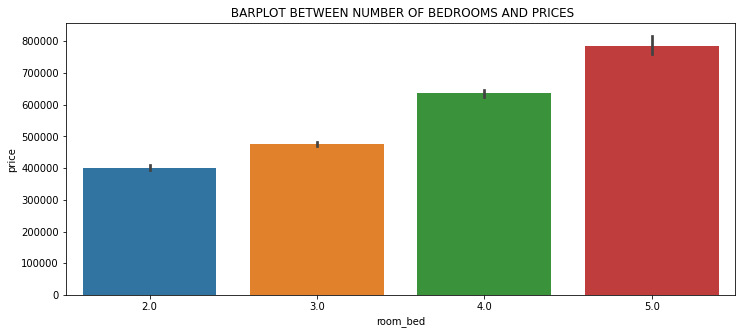

In [570]:

plt.figure(figsize=(12,5))
sns.barplot(x='room_bed',y='price',data=house_df)
plt.title(" BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES")



#Prices increases as the number of bed rooms increase.

### PLOT BETWEEN NUMBER OF BATHROOMS AND PRICE

Text(0.5, 1.0, ' BARPLOT BETWEEN NUMBER OF BATHROOMS AND PRICES')

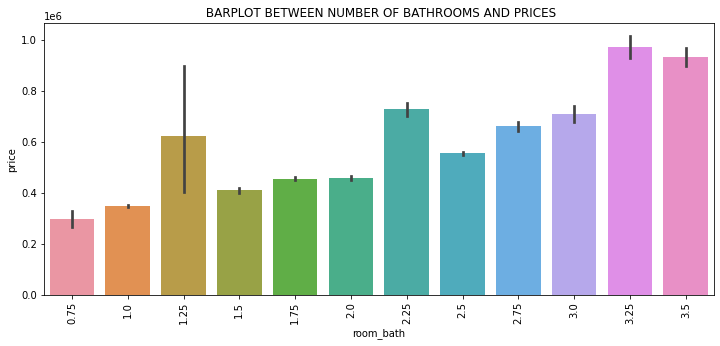

In [571]:
plt.figure(figsize=(12,5))
sns.barplot(x='room_bath',y='price',data=house_df)
plt.xticks(rotation = 90)
plt.title(" BARPLOT BETWEEN NUMBER OF BATHROOMS AND PRICES")

#Prices increase as the number of bath rooms increase.


### PLOT BETWEEN LIVING MEASURE AND PRICE

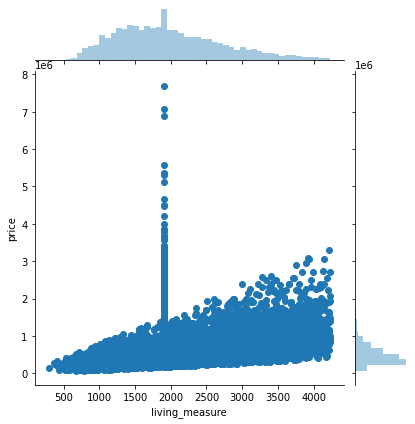

In [572]:
sns.jointplot(x='living_measure',y='price',data=house_df)

#There is a linear increase between living area measure and price.

### PLOT BETWEEN NUMBER OF CEIL AND PRICE

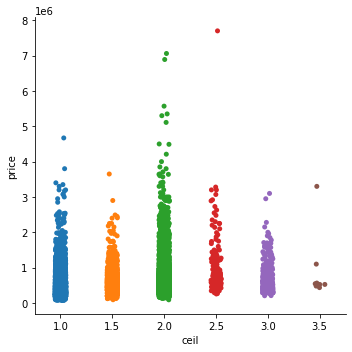

In [573]:
sns.catplot(x="ceil", y="price", data=house_df)

#Prices of 2 celing hosuse is more.

### PLOT BETWEEN COAST FACING AND PRICE

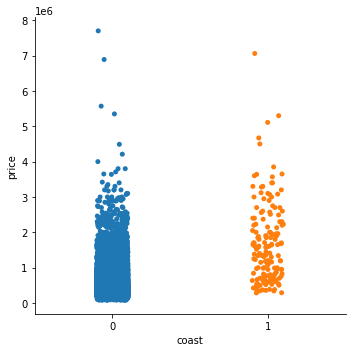

In [574]:
sns.catplot(x="coast", y="price", data=house_df)


This plot tells us that number of houses with no 'Coast'(without the view of waterfront) is much higher than houses with 'coast'. price of house with 'coast' is little higher.

### PLOT BETWEEN CONDITION OF THE HOUSE AND PRICE

Text(0.5, 1.0, 'BARPLOT OF CONDITION VERSUS PRICE')

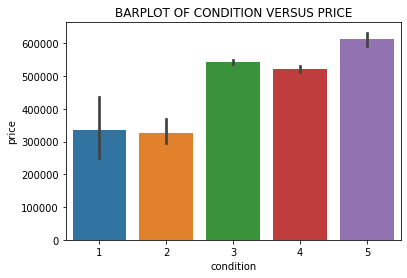

In [575]:
sns.barplot(x='condition',y='price',data=house_df)
plt.title("BARPLOT OF CONDITION VERSUS PRICE")

#Prices of the houses will be more if the condition of the house is good.

### PLOT BETWEEN QUALITY AND PRICE

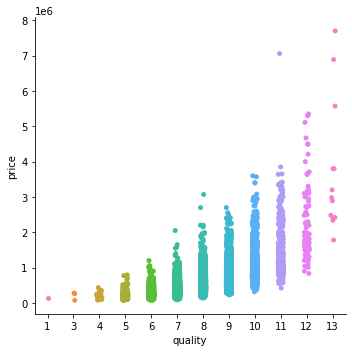

In [576]:
sns.catplot(x="quality", y="price", data=house_df)

Higher the grading to the house greater is the price.

### PLOT BETWEEN FURNISHED AND PRICE

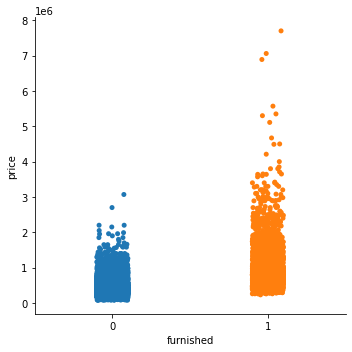

In [577]:
sns.catplot(x="furnished", y="price", data=house_df)

Furnished houses fetch more price than non-furnished.

### PLOT OF LONGITUDE & LATITUDE wrt PRICE

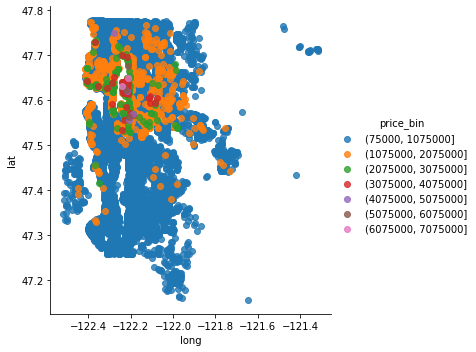

In [578]:
house_df['price_bin'] = pd.cut(house_df.price, bins=[75000,1075000,2075000,3075000,4075000,5075000,6075000,7075000])
sns.lmplot(y='lat',x='long', data=house_df, hue='price_bin', fit_reg=False)

## Binning the attributes:

In [579]:
# First lets see unique values of following attributes which will give brief idea about how we can group them.
print('condition :-')
print (house_df['condition'].sort_values().unique())

print('Quality :-')
print (house_df['quality'].sort_values().unique())

print('Bed Room :-')
print (house_df['room_bed'].sort_values().unique())

print('Bath Room :-')
print (house_df['room_bath'].sort_values().unique())

print('Ceil :-')
print (house_df['ceil'].sort_values().unique())

print('Sight :-')
print (house_df['sight'].sort_values().unique())

print('Year Built:-')
print (house_df['yr_built'].sort_values().unique())

print('Year Renovated :-')
print (house_df['yr_renovated'].sort_values().unique())

print('house Age :-')
print (house_df['house_age'].sort_values().unique())

condition :-
[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
Quality :-
[1, 3, 4, 5, 6, ..., 9, 10, 11, 12, 13]
Length: 12
Categories (12, int64): [1, 3, 4, 5, ..., 10, 11, 12, 13]
Bed Room :-
[2. 3. 4. 5.]
Bath Room :-
[0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5 ]
Ceil :-
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Categories (6, float64): [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Sight :-
[0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]
Year Built:-
[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2

### Binning  'condition' :

In [580]:
house_df['condition_bin']=pd.cut(house_df.condition,bins=(1,3,5,6),labels=['Bad','Medium','Good'],right=False)
house_df[['condition','condition_bin']].head()

,condition,condition_bin
0,5,Good
1,3,Medium
2,3,Medium
3,4,Medium
4,4,Medium


Text(0.5, 1.0, 'Plot against price')

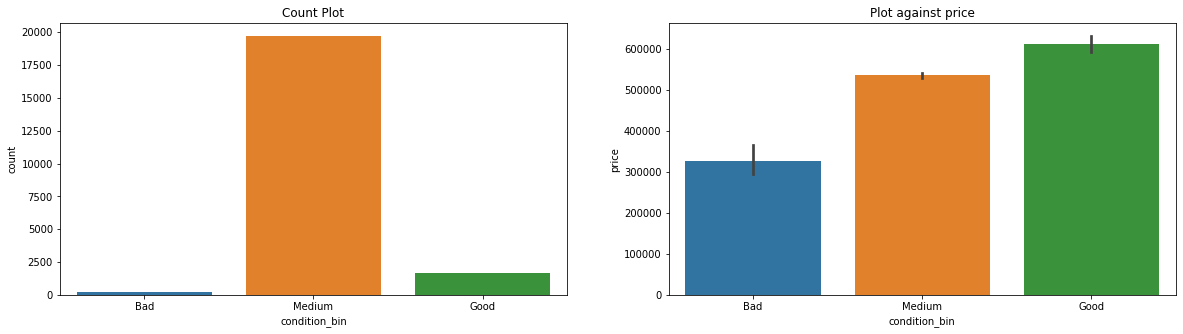

In [581]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='condition_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='condition_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'condition': (1 & 2)=Good,  (3 & 4)=Medium,  (5)=Good.  
#### * Number of houses with 'medium' level of condition arein huge number.
#### * Price of houses with 'Good' level of condition is higher than others.

### Binning 'quality' :

In [582]:
house_df['quality_bin']=pd.cut(house_df.quality,bins=(1,7,10,13),labels=['Bad','Medium','Good'],right=False)
house_df[['quality','quality_bin']].head()

,quality,quality_bin
0,9,Medium
1,8,Medium
2,8,Medium
3,6,Bad
4,8,Medium


Text(0.5, 1.0, 'Plot against price')

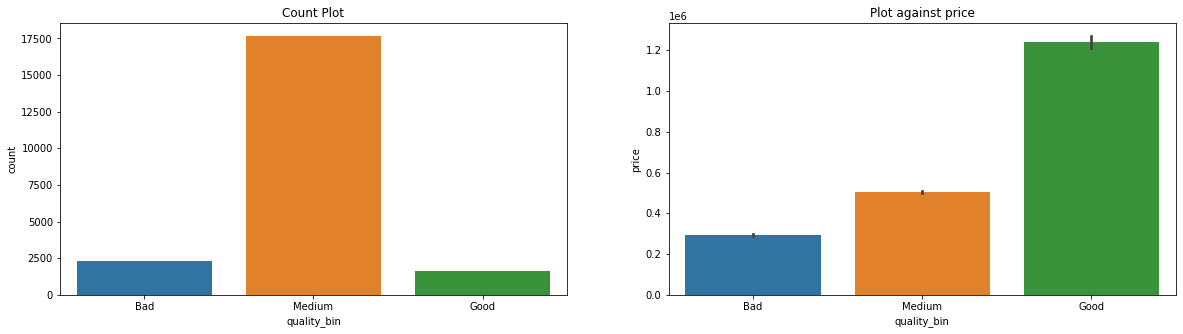

In [583]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='quality_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='quality_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'quality': (1 to 6)=Good,  (7 to 9)=Medium,  (10 to 12)=Good.  
#### * Number of houses with 'medium' level of quality are in huge number.
#### * Price of houses with 'Good' quality is higher than others.


### Binning 'room_bed' :

In [584]:
house_df['room_bed_bin']=pd.cut(house_df.room_bed,bins=(1,3,5,7),labels=['Samll','Medium','Large'],right=False)
house_df[['room_bed','room_bed_bin']].head()

,room_bed,room_bed_bin
0,4.0,Medium
1,4.0,Medium
2,3.0,Medium
3,2.0,Samll
4,2.0,Samll


Text(0.5, 1.0, 'Plot against price')

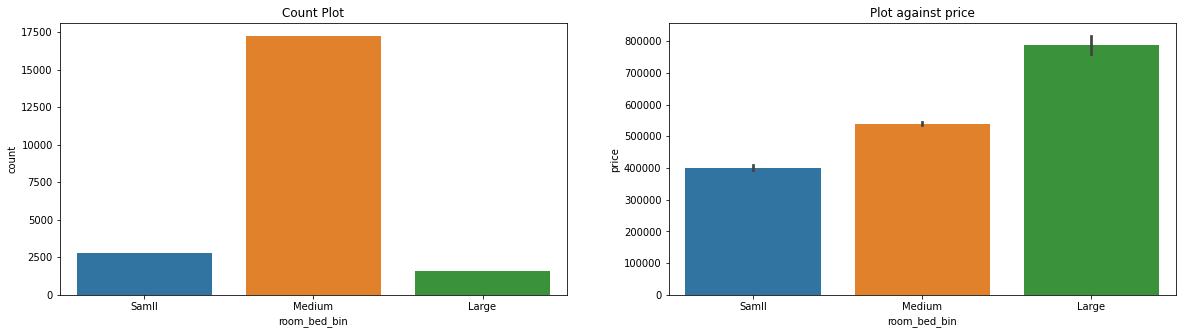

In [585]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='room_bed_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='room_bed_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'room_bed': (1 to 2)=small,  (3 & 4)=Medium,  (5 =<)= Large.  
#### * Number of houses with 'medium' or 3 to 4 number of bed rooms are in huge number.
#### * Price of houses with 'Large' number of rooms is higher than others.

### Binning 'room_bath' :

In [586]:
house_df['room_bath_bin']=pd.cut(house_df.room_bath,bins=(0,2,3,5),labels=['Bath_grp1','Bath_grp2','Bath_grp3'],right=False)
house_df[['room_bath','room_bath_bin']].head()

,room_bath,room_bath_bin
0,3.25,Bath_grp3
1,2.50,Bath_grp2
2,2.50,Bath_grp2
3,1.00,Bath_grp1
4,1.50,Bath_grp1


Text(0.5, 1.0, 'Plot against price')

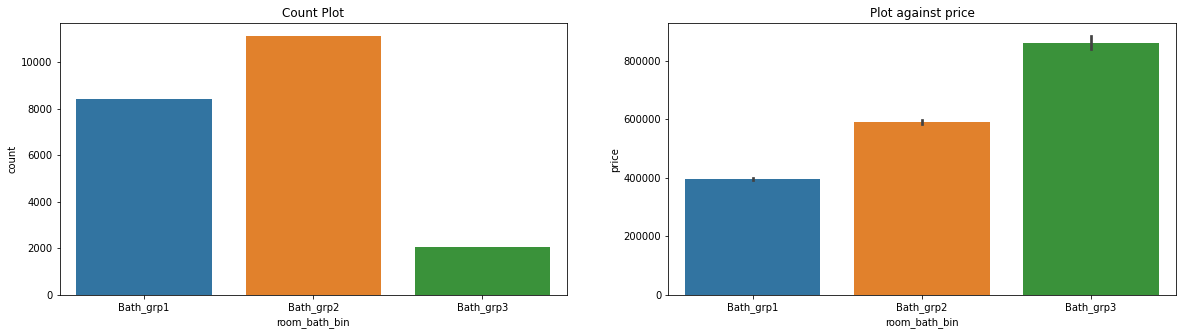

In [587]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='room_bath_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='room_bath_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'room_bath': (0 to 1)=bath_grp1,  (2 to 3)=bath_grp2,  (4 to 5)= bath_grp3.  
#### * Number of houses with  '2 to 3' number of bath rooms more compared to others.
#### * Price of houses with '4 to 5' number of rooms is higher than others.

### Binning 'ceil' :

In [588]:
house_df['ceil_bin']=pd.cut(house_df.ceil,bins=(0,2,3,4),labels=['Floor_grp1','Floor_grp2','Floor_grp3'],right=False)
house_df[['ceil','ceil_bin']].head()

,ceil,ceil_bin
0,1.0,Floor_grp1
1,1.0,Floor_grp1
2,2.0,Floor_grp2
3,1.0,Floor_grp1
4,1.0,Floor_grp1


Text(0.5, 1.0, 'Plot against price')

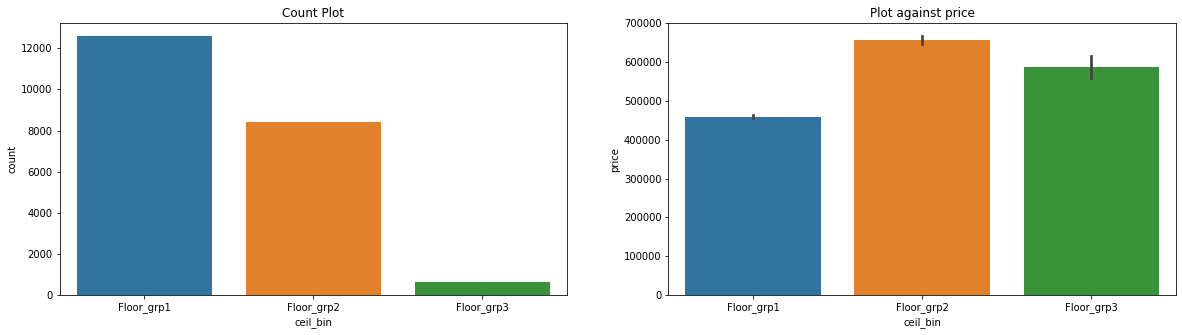

In [589]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='ceil_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='ceil_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'ceil' : (0 to 1)=Floor_grp1,  (2 to 3)=Floor_grp2,  (3 to 4)= Floor_grp3.  
#### * Number of houses with  '0 to 1' number of floors are more compared to others.
#### * Price of houses with '2 to 3' number of rooms is higher than others.

### Binning 'sight' :

In [590]:
house_df['sight_bin']=pd.cut(house_df.sight,bins=(0,2,4,5),labels=['Not Visited','Few Visited','Many Visited'],right=False)
house_df[['sight','sight_bin']].head()

,sight,sight_bin
0,0,Not Visited
1,0,Not Visited
2,0,Not Visited
3,0,Not Visited
4,0,Not Visited


Text(0.5, 1.0, 'Plot against price')

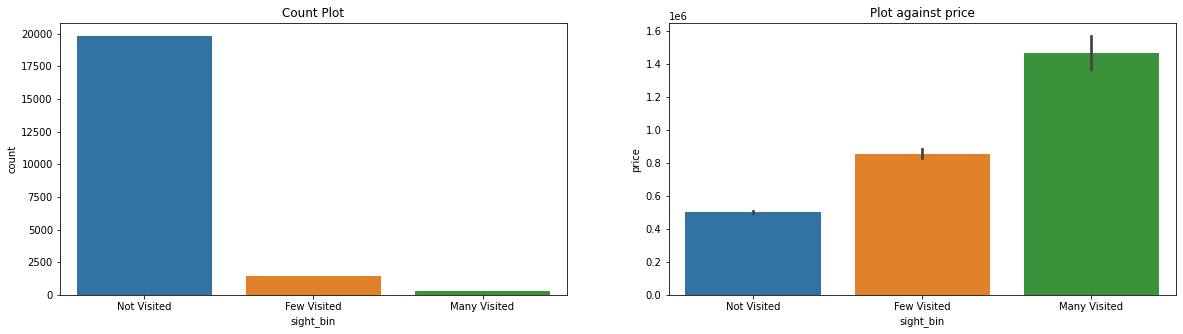

In [591]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='sight_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='sight_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'ceil' : (0 to 1)=Not Visited,  (2 to 3)=Few Visited,  (4 to 5)= many visited.  
#### * Max number of houses are not visited.
#### * Price of houses with many visitors are higherthan other houses.

### Binning 'year_built' :

In [592]:
house_df['yr_built_bin']=pd.cut(house_df.yr_built,bins=(1900,1925,1950,1975,2000,2020),labels=['1900s','1925s','1950s','1975s','2000s'],right=False)
house_df[['yr_built','yr_built_bin']].head()

,yr_built,yr_built_bin
0,1956,1950s
1,1976,1975s
2,2006,2000s
3,1916,1900s
4,1954,1950s


Text(0.5, 1.0, 'Plot against price')

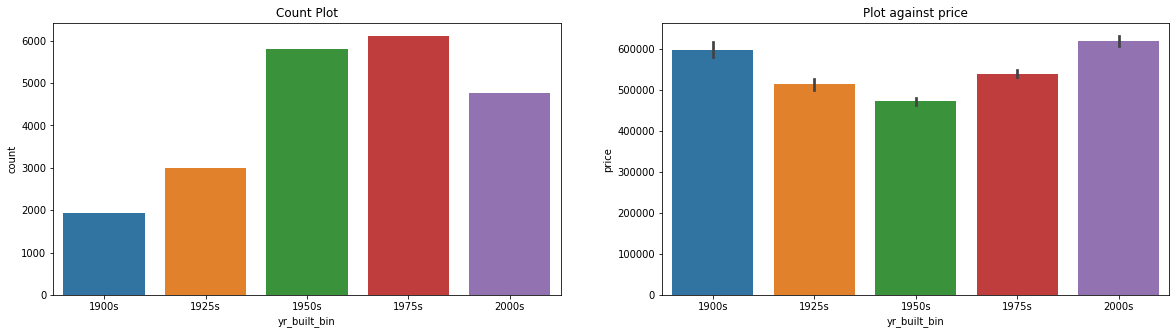

In [593]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='yr_built_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='yr_built_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here 'yr_built' is divided into 5 groups.
#### * Number of houses built in 1950's is more.
#### * Price of houses built in 1900's is more compared to other built year.

### Lat,Long binning:

In [ ]:
longmin = house_df['long'].min()
latmin = house_df['lat'].min()

data_ = {'key':['longmin', 'latmin', ], 'val':[longmin, latmin]} 

lat_long_df = pd.DataFrame(data_) 
lat_long_df.set_index("key", inplace = True) 

#lat_long_df.to_csv('../data/lat_long_df.csv')

house_df['long_bin'] = house_df['long'].apply(lambda val: round(( abs(longmin) - abs(val)) /.2))
house_df['lat_bin'] = house_df['lat'].apply(lambda val: round(( abs(val) - abs(latmin) )/.2))
house_df['region'] = house_df.apply (lambda row: str(row['long_bin'])+'-'+str(row['lat_bin']), axis=1)
#house_df.region = pd.Categorical(house_df.region).codes
house_df['Region_name']= house_df.apply (lambda row: "Region"+'-'+str(row['region']), axis=1)
#house_df.drop(['long_bin', 'lat_bin', 'region'], axis=1, inplace=True)
sns.lmplot(y='lat',x='long', data=house_df, hue='region', fit_reg=False)

### Binning 'house_age' :

In [594]:
age_labels=[0,10,20,30,40,50,60,70,80,90]
house_df['house_age_bin']=pd.qcut(house_df['house_age'],q=10,labels=age_labels)
house_df[['house_age','house_age_bin']].head()

,house_age,house_age_bin
0,58,60
1,38,40
2,9,10
3,98,90
4,61,70


Text(0.5, 1.0, 'Plot against price')

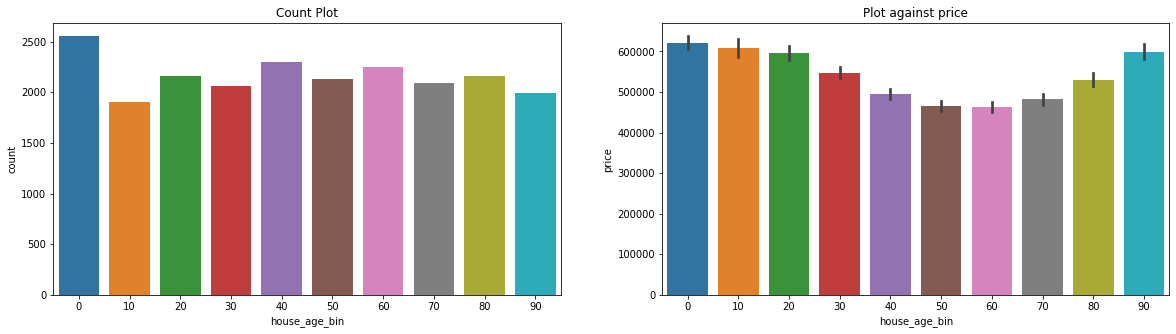

In [595]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='house_age_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='house_age_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * House_age is equally distributed in 10 groups.

### Binning 'year_renovated' :

In [596]:
house_df['yr_renovated_bin']=pd.cut(house_df.yr_renovated,bins=(0,1925,1950,1975,2000,2020),labels=['not renovated','1925s','1950s','1975s','2000s'],right=False)
house_df[['yr_renovated','yr_renovated_bin']].head()

,yr_renovated,yr_renovated_bin
0,0,not renovated
1,0,not renovated
2,0,not renovated
3,0,not renovated
4,0,not renovated


Text(0.5, 1.0, 'Plot against price')

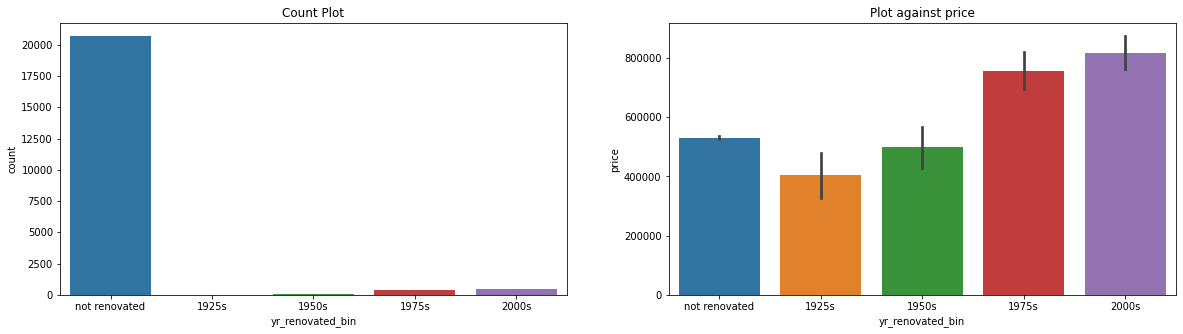

In [597]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='yr_renovated_bin',data=house_df,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='yr_renovated_bin',y='price',data=house_df,ax=ax2)
ax2.set_title("Plot against price")

#### * Here grouping is done for 'yr_renovated' in 5 groups.
#### * Max number of houses are not renavated.
#### * Price of houses renovated in 2000's is more compared to other renovated year.

# Binning Zipcodes

In [598]:
replaceStruct = {
                "zipcode": {98001 : "Auburn", 98002 : "Auburn", 98003 : "Federal Way" , 98004 : "Bellevue" ,98005 : "Bellevue",
                            98006 : "Bellevue", 98007 : "Bellevue", 98008 : "Bellevue", 98010 : "Black Diamond", 98011 : "Bothell",
                            98014 : "Carnation", 98019 : "Duvall", 98022 : "Enumclaw", 98023 : "Federal Way", 98024 : "Fall City",
                            98027 : "Issaquah", 98028 : "Kenmore", 98029 : "Issaquah" , 98030 : "Kent", 98031 : "Kent",
                            98032 : "kent", 98033 : "Kirkland", 98034 : "Kirkland", 98038 : "Maple Valley", 98039 : "Medina",
                            98040 : "Mercer Island", 98042 : "Kent", 98045 : "North Bend", 98052 : "Redmond", 98053 : "Redmond",
                            98055 : "Renton", 98056 : "Renton", 98058 : "Renton", 98059 : "Renton", 98065 : "Snoqualmie", 98072 : "Woodinville",
                            98070 : "Vashon", 98074 : "Sammamish", 98075 : "Sammamish", 98077 : "Woodinville", 98092 : "Auburn",
                            98102 : "Seattle", 98103 : "Seattle" ,98105 : "Seattle" , 98106 : "Seattle",
                            98107 :"Seattle" ,98108 : "Seattle", 98109 : "Seattle", 98112 : "Seattle", 98115:"Seattle", 98116:"Seattle", 98117:"Seattle", 98118:"Seattle", 98119:"Seattle",
                            98122 :"Seattle", 98125:"Seattle", 98126:"Seattle", 98133 :"Seattle", 98136:"Seattle", 98144:"Seattle", 98146:"Seattle", 98148:"Seattle", 98155:"Seattle",
                            98166 : "Seattle", 98168:"Seattle", 98177:"Seattle", 98178:"Seattle", 98188:"Seattle", 98198:"Seattle", 98199:"Seattle"
                            }
                }
house_df = house_df.replace(replaceStruct)

Text(0.5, 1.0, ' BARPLOT BETWEEN ZIPCODE AND PRICES')

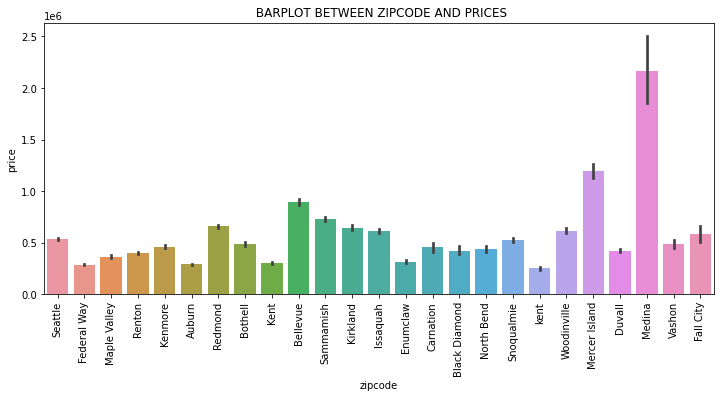

In [599]:
plt.figure(figsize=(12,5))
sns.barplot(x='zipcode',y='price',data=house_df)
plt.xticks(rotation = 90)
plt.title(" BARPLOT BETWEEN ZIPCODE AND PRICES")

In [600]:
house_df.zipcode.unique()

array(['Seattle', 'Federal Way', 'Maple Valley', 'Renton', 'Kenmore',
       'Auburn', 'Redmond', 'Bothell', 'Kent', 'Bellevue', 'Sammamish',
       'Kirkland', 'Issaquah', 'Enumclaw', 'Carnation', 'Black Diamond',
       'North Bend', 'Snoqualmie', 'kent', 'Woodinville', 'Mercer Island',
       'Duvall', 'Medina', 'Vashon', 'Fall City'], dtype=object)

In [601]:
house_df.zipcode.describe()

count       21613
unique         25
top       Seattle
freq         8977
Name: zipcode, dtype: object

In [602]:
house_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,price_bin,condition_bin,quality_bin,room_bed_bin,room_bath_bin,ceil_bin,sight_bin,yr_built_bin,house_age_bin,yr_renovated_bin
0,3034200666,20141107T000000,808100,4.0,3.25,3020.0,13457.0,1.0,0,0,...,"(75000, 1075000]",Good,Medium,Medium,Bath_grp3,Floor_grp1,Not Visited,1950s,60,not renovated
1,8731981640,20141204T000000,277500,4.0,2.50,2550.0,7500.0,1.0,0,0,...,"(75000, 1075000]",Medium,Medium,Medium,Bath_grp2,Floor_grp1,Not Visited,1975s,40,not renovated
2,5104530220,20150420T000000,404000,3.0,2.50,2370.0,4324.0,2.0,0,0,...,"(75000, 1075000]",Medium,Medium,Medium,Bath_grp2,Floor_grp2,Not Visited,2000s,10,not renovated
3,6145600285,20140529T000000,300000,2.0,1.00,820.0,3844.0,1.0,0,0,...,"(75000, 1075000]",Medium,Bad,Samll,Bath_grp1,Floor_grp1,Not Visited,1900s,90,not renovated
4,8924100111,20150424T000000,699000,2.0,1.50,1400.0,4050.0,1.0,0,0,...,"(75000, 1075000]",Medium,Medium,Samll,Bath_grp1,Floor_grp1,Not Visited,1950s,70,not renovated


In [607]:
print('correlation between living_measure and price:')
print(house_df['living_measure'].corr(house_df['price']))

print('\ncorrelation between living_measure15 and price:')
print(house_df['living_measure15'].corr(house_df['price']))

print('\ncorrelation between lot_measure and price:')
print(house_df['lot_measure'].corr(house_df['price']))

print('\ncorrelation between lot_measure15 and price:')
print(house_df['lot_measure15'].corr(house_df['price']))

print('\ncorrelation between basement and price:')
print(house_df['basement'].corr(house_df['price']))


correlation between living_measure and price:
0.4698618477335944

correlation between living_measure15 and price:
0.43607168480366193

correlation between lot_measure and price:
0.10370394435639435

correlation between lot_measure15 and price:
0.09761614668984993

correlation between basement and price:
0.16086228217889004


#### looking at the above correlation values of living_measure, living_measure15 with 'price'; we can retain living_measure since its correlation with 'price'  is high and drop the other one.
#### And between lot_measure and lot_measure15; we can retain lot_measure since its correlation with 'price'  is little higher and drop the other one.

In [608]:
# A function to add Mean Encoded feature by considering the mean target value.
def meanEnc (dataSet,indFeatureName):
    #compute global mean
    tar_mean = dataSet.price.mean()
    #compute the number of values and mean of each group
    agg = dataSet.groupby(indFeatureName)['price'].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    weight = 100
    #compute smoothed means
    smooth = (counts * means + weight * tar_mean)/(counts + weight)
    print (smooth)
    smooth1 = smooth.copy()
    smooth = smooth.reset_index()
    grpDF = pd.DataFrame(smooth, columns=smooth.columns)
    grpDF.rename(columns = {indFeatureName:'key', 0:"val"}, inplace = True) 
    grpDF.set_index("key", inplace = True) 
    #grpDF.to_csv('../data/'+indFeatureName+'.csv')
    dataSet.loc[:,indFeatureName+'_enc'] = dataSet[indFeatureName].map(smooth1)



In [609]:
#lets remove unwanted columns
#lets create a function to drop columns
def dropcols (col_list):
    for col in col_list:
        if col in house_df.columns:
            house_df.drop(col,axis=1,inplace=True)
            print("dropped column: " + col)

In [612]:
meanEnc(house_df, house_df.room_bed_bin.name)
meanEnc(house_df, house_df.room_bath_bin.name)
meanEnc(house_df, house_df.condition_bin.name)
meanEnc(house_df, house_df.quality_bin.name)
meanEnc(house_df, house_df.ceil_bin.name)
meanEnc(house_df, house_df.sight_bin.name)
meanEnc(house_df, house_df.yr_built_bin.name)
meanEnc(house_df, house_df.house_age_bin.name)
meanEnc(house_df, house_df.yr_renovated_bin.name)
meanEnc(house_df, house_df.zipcode.name)
meanEnc(house_df, house_df.Region_name.name)
meanEnc(house_df, house_df.furnished.name)
meanEnc(house_df, house_df.coast.name)

room_bed_bin
Samll     406240.698559
Medium    539497.438674
Large     772371.365008
dtype: float64
room_bath_bin
Bath_grp1    398278.354624
Bath_grp2    588592.901978
Bath_grp3    847215.787335
dtype: float64
condition_bin
Bad       398508.459865
Medium    536125.650423
Good      608557.998823
dtype: float64
quality_bin
Bad       3.051981e+05
Medium    5.059291e+05
Good      1.198494e+06
dtype: float64
ceil_bin
Floor_grp1    460575.217485
Floor_grp2    655572.372134
Floor_grp3    580632.216199
dtype: float64
sight_bin
Not Visited     5.021068e+05
Few Visited     8.349597e+05
Many Visited    1.243795e+06
dtype: float64
yr_built_bin
1900s    594648.566754
1925s    514605.682249
1950s    472663.741516
1975s    539232.000947
2000s    616876.352311
dtype: float64
house_age_bin
0     617503.901273
10    604235.781831
20    592625.980954
30    546807.199018
40    497280.694787
50    468265.045197
60    465525.449119
70    485127.842242
80    530914.625388
90    594905.765717
dtype: float64
y

In [613]:
house_df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'yr_sold', 'house_age', 'price_bin', 'condition_bin',
       'quality_bin', 'room_bed_bin', 'room_bath_bin', 'ceil_bin', 'sight_bin',
       'yr_built_bin', 'house_age_bin', 'yr_renovated_bin', 'long_bin',
       'lat_bin', 'region', 'Region_name', 'room_bed_bin_enc',
       'room_bath_bin_enc', 'condition_bin_enc', 'quality_bin_enc',
       'ceil_bin_enc', 'sight_bin_enc', 'yr_built_bin_enc',
       'house_age_bin_enc', 'yr_renovated_bin_enc', 'zipcode_enc',
       'Region_name_enc', 'furnished_enc', 'coast_enc'],
      dtype='object')

In [614]:
col=['cid','lat', 'long','dayhours','room_bed', 'room_bath','ceil','sight', 'condition','zipcode', 'quality','yr_built','living_measure15', 
     'lot_measure15','yr_sold', 'price_bin','condition_bin', 'quality_bin', 'room_bed_bin', 'room_bath_bin','ceil_bin',
     'sight_bin', 'yr_built_bin', 'house_age_bin','yr_renovated_bin','Region_name','region','furnished','coast','lat_bin','long_bin']
dropcols(col)

dropped column: cid
dropped column: lat
dropped column: long
dropped column: dayhours
dropped column: room_bed
dropped column: room_bath
dropped column: ceil
dropped column: sight
dropped column: condition
dropped column: zipcode
dropped column: quality
dropped column: yr_built
dropped column: living_measure15
dropped column: lot_measure15
dropped column: yr_sold
dropped column: price_bin
dropped column: condition_bin
dropped column: quality_bin
dropped column: room_bed_bin
dropped column: room_bath_bin
dropped column: ceil_bin
dropped column: sight_bin
dropped column: yr_built_bin
dropped column: house_age_bin
dropped column: yr_renovated_bin
dropped column: Region_name
dropped column: region
dropped column: furnished
dropped column: coast
dropped column: lat_bin
dropped column: long_bin


In [615]:
house_df.head()

,price,living_measure,lot_measure,ceil_measure,basement,yr_renovated,total_area,house_age,room_bed_bin_enc,room_bath_bin_enc,...,quality_bin_enc,ceil_bin_enc,sight_bin_enc,yr_built_bin_enc,house_age_bin_enc,yr_renovated_bin_enc,zipcode_enc,Region_name_enc,furnished_enc,coast_enc
0,808100,3020.0,13457.0,3020.0,0.0,0,16477.0,58,539497.438674,847215.787335,...,505929.081563,460575.217485,502106.825153,472663.741516,465525.449119,530494.759887,535125.845971,549520.771434,950717.042951,531692.982454
1,277500,2550.0,7500.0,1750.0,800.0,0,10050.0,38,539497.438674,588592.901978,...,505929.081563,460575.217485,502106.825153,539232.000947,497280.694787,530494.759887,317922.681319,316865.434294,437889.335464,531692.982454
2,404000,2370.0,4324.0,2370.0,0.0,0,6694.0,9,539497.438674,588592.901978,...,505929.081563,655572.372134,502106.825153,616876.352311,604235.781831,530494.759887,391992.898376,471365.212931,437889.335464,531692.982454
3,300000,820.0,3844.0,820.0,0.0,0,4664.0,98,406240.698559,398278.354624,...,305198.109357,460575.217485,502106.825153,594648.566754,594905.765717,530494.759887,535125.845971,549520.771434,437889.335464,531692.982454
4,699000,1400.0,4050.0,1400.0,0.0,0,5450.0,61,406240.698559,398278.354624,...,505929.081563,460575.217485,502106.825153,472663.741516,485127.842242,530494.759887,535125.845971,549520.771434,437889.335464,531692.982454


In [616]:
house_df.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_renovated', 'total_area', 'house_age', 'room_bed_bin_enc',
       'room_bath_bin_enc', 'condition_bin_enc', 'quality_bin_enc',
       'ceil_bin_enc', 'sight_bin_enc', 'yr_built_bin_enc',
       'house_age_bin_enc', 'yr_renovated_bin_enc', 'zipcode_enc',
       'Region_name_enc', 'furnished_enc', 'coast_enc'],
      dtype='object')

In [617]:
house_df=house_df.fillna(house_df.mean())

In [619]:
house_df.shape

(21613, 21)

In [620]:
house_df.isnull().sum()

price                   0
living_measure          0
lot_measure             0
ceil_measure            0
basement                0
yr_renovated            0
total_area              0
house_age               0
room_bed_bin_enc        0
room_bath_bin_enc       0
condition_bin_enc       0
quality_bin_enc         0
ceil_bin_enc            0
sight_bin_enc           0
yr_built_bin_enc        0
house_age_bin_enc       0
yr_renovated_bin_enc    0
zipcode_enc             0
Region_name_enc         0
furnished_enc           0
coast_enc               0
dtype: int64

### Finding feature importance

In [621]:
#Import Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [622]:
#Split Data 
ytemp = house_df[['price']]  # dependent variable
Xtemp = house_df.drop(['price'], axis=1) # independant variables

Text(0, 0.5, 'Feature Importance Score')

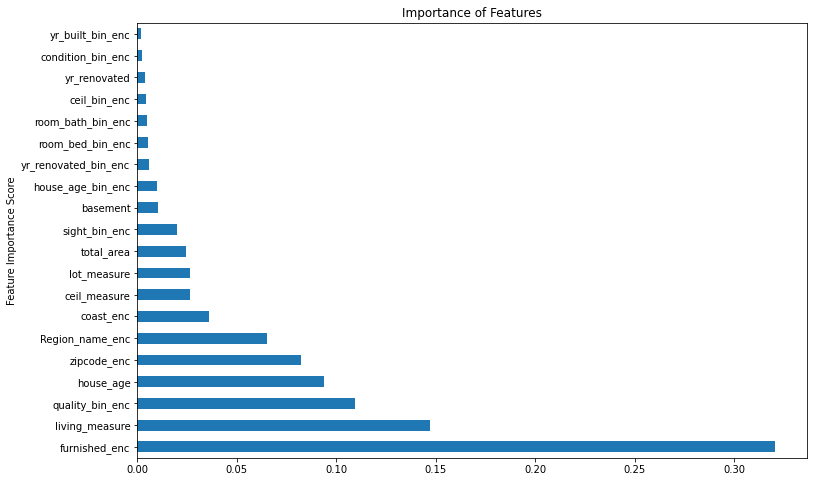

In [623]:
predictors=list(Xtemp)
model = DecisionTreeRegressor()
model.fit(Xtemp, ytemp)
plt.rcParams['figure.figsize']=[12,8]
feature_importance = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
df=feature_importance.nlargest(20).plot(kind='barh', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#plot Graph of feature importances for better visualisation
#feat_importances=pd.Series(model.feature_importances_,index=Xtemp.columns)
#feat_importances.nlargest(12).plot(kind='barh') # extracting top 12 features that are contributing to our Target column.

In [624]:
feature_importance

furnished_enc           0.320618
living_measure          0.147270
quality_bin_enc         0.109368
house_age               0.093874
zipcode_enc             0.082456
Region_name_enc         0.065291
coast_enc               0.036127
ceil_measure            0.026547
lot_measure             0.026489
total_area              0.024635
sight_bin_enc           0.019954
basement                0.010270
house_age_bin_enc       0.009852
yr_renovated_bin_enc    0.005627
room_bed_bin_enc        0.005098
room_bath_bin_enc       0.004751
ceil_bin_enc            0.004052
yr_renovated            0.003608
condition_bin_enc       0.002365
yr_built_bin_enc        0.001747
dtype: float64

#### we can drop last 15  columns since they have least feature_importance and select the remaining for further modeling.

In [625]:
col=['yr_renovated_bin_enc','yr_built_bin_enc','condition_bin_enc']
dropcols(col)

dropped column: yr_renovated_bin_enc
dropped column: yr_built_bin_enc
dropped column: condition_bin_enc


In [626]:
house_df.shape

(21613, 18)

In [627]:
house_df.columns       
            

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_renovated', 'total_area', 'house_age', 'room_bed_bin_enc',
       'room_bath_bin_enc', 'quality_bin_enc', 'ceil_bin_enc', 'sight_bin_enc',
       'house_age_bin_enc', 'zipcode_enc', 'Region_name_enc', 'furnished_enc',
       'coast_enc'],
      dtype='object')

#### At this point we have completed our feature engineering.  Now we will start building our models.

## Supervised Learning Models:

In [628]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

In [640]:
#Split Data 
y = house_df[['price']]  # dependent variable
X = house_df.drop(['price'], axis=1) # independant variables

In [641]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [642]:
linreg = LinearRegression()
linreg = linreg.fit(X_train,y_train)
print("linear reg on train data ", linreg.score(X_train,y_train))
print("linear reg on test data ", linreg.score(X_test,y_test))


linear reg on train data  0.6387317213737068
linear reg on test data  0.6081206635707701


In [643]:
dtree_model=DecisionTreeRegressor()
dtree_model=dtree_model.fit(X_train,y_train)
print("DecisionTreeRegressor on train data ", dtree_model.score(X_train,y_train))
print("DecisionTreeRegressor on test data ", dtree_model.score(X_test,y_test))

DecisionTreeRegressor on train data  0.9998839683022313
DecisionTreeRegressor on test data  0.5644828365196926


In [644]:
bgcl = BaggingRegressor(n_estimators=50)
bgcl = bgcl.fit(X_train,y_train)
print("BaggingRegressor on train data ", bgcl.score(X_train,y_train))
print("BaggingRegressor on test data ", bgcl.score(X_test,y_test))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor on train data  0.9701040238603179
BaggingRegressor on test data  0.7694929708359112


In [645]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("GradientBoostingRegressor on train data ",gbmTree.score(X_train,y_train))
print("GradientBoostingRegressor on test data ",gbmTree.score(X_test,y_test))


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor on train data  0.794232865654293
GradientBoostingRegressor on test data  0.7459305609610516


In [646]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("RandomForestRegressor on train data ", rfTree.score(X_train,y_train))
print("RandomForestRegressor on test data ", rfTree.score(X_test,y_test))

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor on train data  0.9697593273914629
RandomForestRegressor on test data  0.7694555195683396


In [636]:
GBR_model_Tuned=GradientBoostingRegressor(max_depth=3,  n_estimators=100, learning_rate=0.2, loss='huber', min_samples_leaf= 4)
GBR_model_Tuned.fit(X_train,y_train)
print("GBR_model_Tuned on train data ",gbmTree.score(X_train,y_train))
print("GBR_model_Tuned on test data ",gbmTree.score(X_test,y_test))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBR_model_Tuned on train data  0.6826392110935406
GBR_model_Tuned on test data  0.6600498943397954


#### Random Forest Regressor is giving almost 77% accuracy;which is better than any other regressor models.

### Save Model

In [647]:
import pickle
rfTree.fit(X,y.values.ravel())

#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to (n, )

# Saving model to disk
pickle.dump(rfTree, open('../Desktop/CAPSTONE/model/housePrice.pkl','wb'))

In [648]:
model = pickle.load(open('../Desktop/CAPSTONE/model/housePrice.pkl', 'rb'))